In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

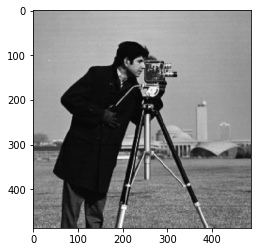

In [2]:
path = "../img/cameraman.jpg"
inp_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(inp_img, "gray")

In [4]:
def _normalize(img):
    new_image = np.zeros(img.shape)
    max_ = img.max()
    min_ = img.min()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = (img[i][j]-min_)/(max_-min_)*255
    
    print(img.min(), img.max())
    print(new_image.min(), new_image.max())
    return new_image
    

-1.7746855323079607 13.872511192756201
0.0 255.0


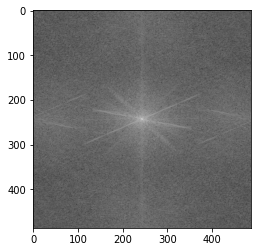

In [6]:
img = np.log1p(inp_img)
img = np.fft.fft2(img)
img = np.fft.fftshift(img)
magnitude = _normalize(np.log(np.abs(img)))
plt.imshow(magnitude, "gray")

7.733264155950895e-65 1.0
0.0 255.0


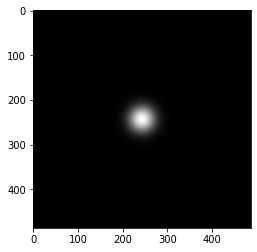

In [15]:
height , width = inp_img.shape
sigma = int(input("Enter the value of sigma: "))
gauss = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        gauss[i][j]=np.exp(-((i-height//2)**2+(j-width//2)**2)/(2*sigma**2))/(2*np.pi*sigma**2)
# gauss = gauss/np.max(gauss)
gauss_img = _normalize(gauss)
plt.imshow(gauss_img, "gray")

In [16]:
mag = np.abs(img)
angle = np.angle(img)

7.8493492393025015 218.83872977387938
0.0 255.0


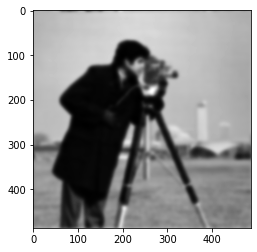

In [17]:
new_mag = mag*gauss
combined = np.multiply(new_mag, np.exp(1j*angle))
imgCombined = np.real(np.fft.ifft2(np.fft.ifftshift(combined)))
imgCombined = np.exp(imgCombined)-1
plt.imshow(_normalize(imgCombined), "gray")